**ДЗ №2. Анализ данных пассажиров "Титаника"**

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv



Значение столбцов таблицы:

PassengerId — идентификатор пассажира

Survival — поле в котором указано спасся человек (1) или нет (0)

Pclass — содержит социально-экономический статус:

высокий
средний
низкий

Name — имя пассажира

Sex — пол пассажира

Age — возраст

SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)

Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)

Ticket — номер билета

Fare — цена билета

Cabin — каюта

Embarked — порт посадки

C — Cherbourg
Q — Queenstown
S — Southampton

Ответьте на следующие вопросы:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Сколько мужчин / женщин находилось на борту?

In [7]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?

In [8]:
data.Pclass.unique()

array([3, 1, 2])

In [11]:
data.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [13]:
data.Pclass[data.Sex == 'female'].value_counts(normalize=True)

3    0.458599
1    0.299363
2    0.242038
Name: Pclass, dtype: float64

In [14]:
data.Pclass[data.Sex == 'male'].value_counts(normalize=True)

3    0.601386
1    0.211438
2    0.187175
Name: Pclass, dtype: float64

In [20]:
data.Pclass[(data.Sex == 'male') & (data.Pclass == 2)].shape[0]

108

Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [25]:
round(data.Fare.median(),2)

14.45

In [26]:
round(data.Fare.std(),2)

49.69

Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [50]:
younger = data[(data.Age < 30) & (data.Survived == 1)].shape[0] / data[data.Survived == 1].shape[0]
print(f'Доля младше 30 лет: {younger}')

Доля младше 30 лет: 0.45614035087719296


In [51]:
older = data[(data.Age > 60) & (data.Survived == 1)].shape[0] / data[data.Survived == 1].shape[0]
print(f'Доля старше 30 лет: {older}')

Доля старше 30 лет: 0.014619883040935672


In [52]:
print('True' if younger>older else 'False')

True


Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [53]:
male_procent = data[(data.Sex == 'male') & (data.Survived == 1)].shape[0] / data[data.Survived == 1].shape[0]
print(f'Доля выживших женщин: {older}')

Доля выживших женщин: 0.014619883040935672


In [54]:
female_procent = data[(data.Sex == 'female') & (data.Survived == 1)].shape[0] / data[data.Survived == 1].shape[0]
print(f'Доля выживших мужчин: {female_procent}')

Доля выживших мужчин: 0.6812865497076024


In [55]:
print('True' if female_procent>male_procent else 'False')

True


Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [58]:
data.query("Sex =='male'")['Name'].apply(lambda x: x.split(',')[0]).value_counts().idxmax()

'Panula'

Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

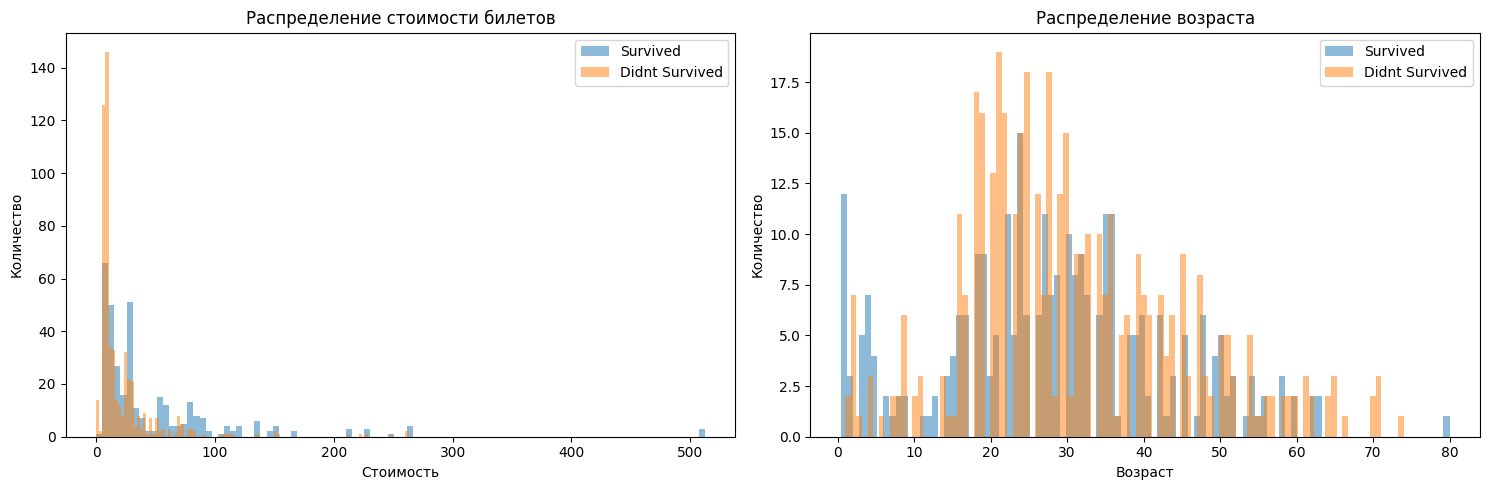

In [64]:
import matplotlib.pyplot as plt

survived = data[data.Survived == 1]
didntSurvived = data[data.Survived == 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(survived.Fare, bins=100, alpha=0.5, label='Survived')
plt.hist(didntSurvived.Fare, bins=100, alpha=0.5, label='Didnt Survived')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.legend()
plt.title('Распределение стоимости билетов')

plt.subplot(1, 2, 2)
plt.hist(survived.Age.dropna(), bins=100, alpha=0.5, label='Survived')
plt.hist(didntSurvived.Age.dropna(), bins=100, alpha=0.5, label='Didnt Survived')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.title('Распределение возраста')

plt.tight_layout()
plt.show()

In [67]:
print('True' if didntSurvived.size>survived.size else 'False')

True


Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

- В среднем мужчины 1-го класса старше 40 лет

- В среднем женщины 1-го класса старше 40 лет

- Мужчины всех классов в среднем старше женщин того же класса

- В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [73]:
print(data.Age[(data.Pclass == 1) & (data.Sex == 'male')].mean() > 40)

True


In [74]:
print(data.Age[(data.Pclass == 1) & (data.Sex == 'female')].mean() > 40)

False


In [76]:
print(data.groupby(['Pclass', 'Sex'])['Age'].mean())
print('Ответ - да')

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
Ответ - да


In [78]:
class1 = data.Age[data.Pclass == 1].mean()
class2 = data.Age[data.Pclass == 2].mean()
class3 = data.Age[data.Pclass == 3].mean()

print('True' if class1>class2>class3 else 'False')

True


**ДЗ №1**

In [81]:
studentsUrl = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
studentsData = pd.read_csv(studentsUrl, on_bad_lines='skip', delimiter=',')
studentsData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [82]:
studentsData.reason.value_counts().idxmax()

'course'

Найдите количество студентов, у родителей которых нет никакого образования.

In [84]:
studentsData[(studentsData.Medu == 0) & (studentsData.Fedu == 0)].shape[0]

0

Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [85]:
studentsData.age[(studentsData.school == 'MS')].min()

17

Найдите количество студентов, имеющих нечетное число пропусков.

In [86]:
studentsData[(studentsData.absences % 2 == 1)].size

1353

Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [87]:
round(studentsData.G3[studentsData.romantic == 'yes'].mean() - studentsData.G3[studentsData.romantic == 'no'].mean(), 2)

-1.26

Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

In [88]:
studentsData.absences[(studentsData.activities == (' '.join(studentsData.activities.value_counts()[:1].index.tolist())))].value_counts().keys()[0]

0